In [4]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 설치된 폰트 
plt.rcParams['font.family'] = 'HYGraphic-Medium'

In [5]:
vocab_logits = {"나는": 0.01,"내일": 0.03,"오늘": 0.25,"어제": 0.3,
                "산에": 0.4,"학교에": 0.5,"집에": 0.65,
                "오른다": 1.2,"간다": 1.05,"왔다": 0.95}
list(vocab_logits.keys())

['나는', '내일', '오늘', '어제', '산에', '학교에', '집에', '오른다', '간다', '왔다']

In [6]:
def softmax_with_temperature(values, temperature):
    epsilon = 1e-2    
    temperature = temperature or epsilon 
        
    # Calculate the softmax with temperature
    exp_values = np.exp(np.array(values) / temperature)
    sum_exp_values = np.sum(exp_values)
    softmax_probs = exp_values / sum_exp_values
    
    return softmax_probs.tolist()

values = np.arange(0, 2, 0.1)
#values = np.arange(0, 10)
temperature = 0.25  
out=softmax_with_temperature(values, temperature)
out= [round(x, 3) for x in out]
print(out)

[0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.002, 0.003, 0.004, 0.006, 0.009, 0.013, 0.02, 0.03, 0.045, 0.067, 0.099, 0.148, 0.221, 0.33]


모델의 최종 레이어 산출 값의 분포 


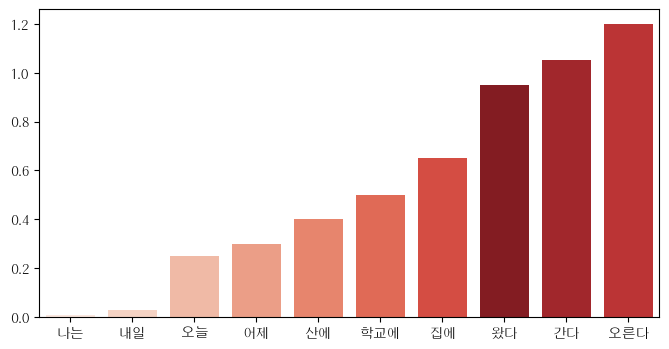

In [15]:
def draw_prob_graph(vocab, probs):

    # Smaller figure size
    plt.figure(figsize=(8, 4))

    # Gradient from light to dark red
    colors = sns.color_palette("Reds", n_colors=len(vocab))

    # Sort the vocabulary and probabilities
    sorted_vocab_prob = sorted(zip(vocab, probs), key=lambda x: x[1])
    sorted_vocab, sorted_probs = zip(*sorted_vocab_prob)

    # Convert numpy array to list for the palette
    palette_as_list = [colors[vocab.index(word)] for word in sorted_vocab]

    # Using 'hue' with the same values as 'x' and setting legend to False
    sns.barplot(x=sorted_vocab, y=sorted_probs, hue=sorted_vocab, palette=palette_as_list, dodge=False)
    plt.legend([],[], frameon=False)

    plt.show()


vocab = list(vocab_logits.keys())
logits = list(vocab_logits.values())
print("모델의 최종 레이어 산출 값의 분포 ")
draw_prob_graph(vocab, logits)


기본적인 확률분포로 변경된 상태 


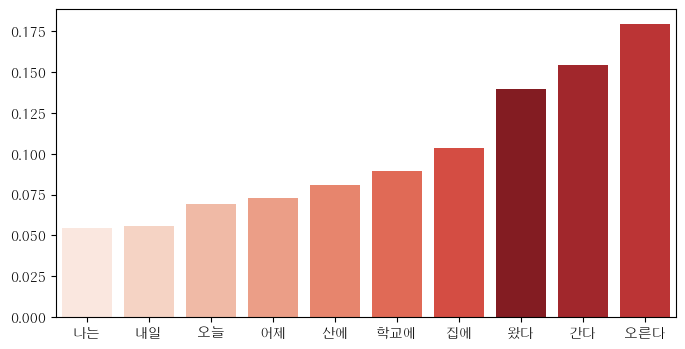

In [17]:
probs = softmax_with_temperature(logits, temperature=1)
print("로짓에서 확률분포로 변경된 상태")
draw_prob_graph(vocab, probs)

temperature=0.25 상태의 확률분포


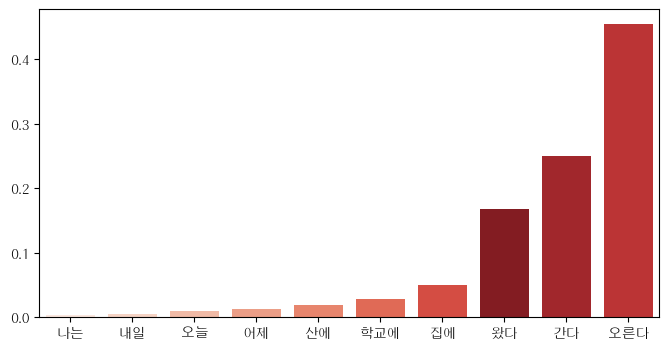

In [19]:
probs = softmax_with_temperature(logits, temperature=0.25)
print("temperature=0.25 상태의 확률분포")
draw_prob_graph(vocab, probs)

In [21]:
# 주어진 확률 분포에 따라 np.random.choice를 100번 수행하고 각 단어별 출현 횟수를 계산하는 함수
def count_word_occurrences(context, vocab, probs, num_samples=100):
    occurrences = {context + word: 0 for word in vocab}
    for _ in range(num_samples):
        sampled_word = context + np.random.choice(vocab, p=probs)
        occurrences[sampled_word] += 1
    return occurrences

# 단어별 출현 횟수 계산
temperature = 0.25
probs = softmax_with_temperature(logits, temperature)
context = "나는 내일 산에 "
word_occurrences = count_word_occurrences(context, vocab, probs, 100)
word_occurrences =  {k: v for k, v in sorted(word_occurrences.items(), key=lambda item: item[1], reverse=True)}
print("완성된 문장의 빈도수")  
word_occurrences

완성된 문장의 빈도수


{'나는 내일 산에 오른다': 51,
 '나는 내일 산에 왔다': 16,
 '나는 내일 산에 간다': 13,
 '나는 내일 산에 학교에': 10,
 '나는 내일 산에 집에': 6,
 '나는 내일 산에 오늘': 2,
 '나는 내일 산에 나는': 1,
 '나는 내일 산에 어제': 1,
 '나는 내일 산에 내일': 0,
 '나는 내일 산에 산에': 0}

temperature=100


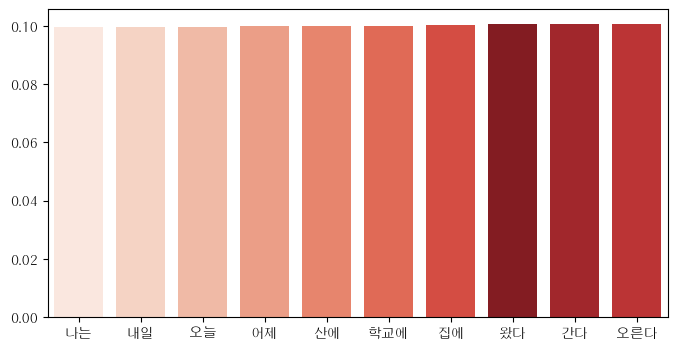

In [22]:
probs = softmax_with_temperature(logits, temperature=100)
print("temperature=100")
draw_prob_graph(vocab, probs)

temperature=0.01


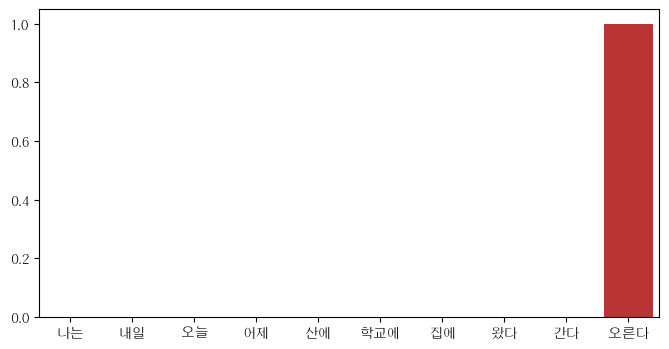

In [23]:
probs = softmax_with_temperature(logits, temperature=0.01)
print("temperature=0.01")
draw_prob_graph(vocab, probs)

top_p
(0.4552478565006194, 0.2498453209544036, 0.16747632704394483, 0.0504429003379512, 0.027683650663798916, 0.018556905987392246, 0.012439066075747799, 0.010184245935783771, 0.004224251182525705, 0.003899475317832554)


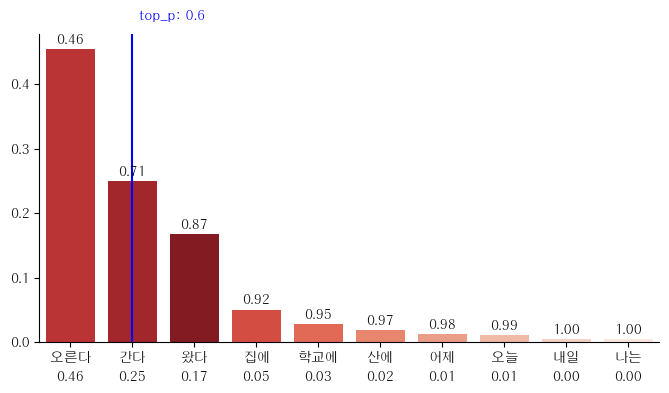

In [24]:
def draw_prob_graph(vocab, probs, top_p):

    # Smaller figure size
    plt.figure(figsize=(8, 4))

    # Gradient from light to dark red
    colors = sns.color_palette("Reds", n_colors=len(vocab))

    # Sort the vocabulary and probabilities
    sorted_vocab_prob = sorted(zip(vocab, probs), key=lambda x: x[1], reverse=True)
    sorted_vocab, sorted_probs = zip(*sorted_vocab_prob)

    # Convert numpy array to list for the palette
    palette_as_list = [colors[vocab.index(word)] for word in sorted_vocab]
    print(sorted_probs)

    # Using 'hue' with the same values as 'x' and setting legend to False
    sns.barplot(x=sorted_vocab, y=sorted_probs, hue=sorted_vocab, palette=palette_as_list, dodge=False)
    plt.legend([],[], frameon=False)

    
    # Calculate and plot cumulative probabilities
    cumulative_probs = np.cumsum(sorted_probs)
    for i, (word, prob, cum_prob) in enumerate(zip(sorted_vocab, sorted_probs, cumulative_probs)):
        #plt.text(i, prob, f'{prob:.2f}/ {cum_prob:.2f}', ha='center', va='bottom')
        plt.text(i, prob+0.005, f'{cum_prob:.2f}', ha='center', va='bottom')

    cutoff_index = next(i for i, cum_prob in enumerate(cumulative_probs) if cum_prob > 0.6)

     # Add the text with the probabilities below the bars
    for i, prob in enumerate(sorted_probs):
        plt.text(i, -0.045, f'{prob:.2f}', ha='center', va='top', color='black')


    # Draw a vertical line at the cutoff point
    plt.axvline(x=cutoff_index, color='blue')
    plt.text(cutoff_index + 0.1, 0.5, f'top_p: {top_p}', color='blue', ha='left')        

    sns.despine()
    plt.show()


vocab = list(vocab_logits.keys())
logits = list(vocab_logits.values())
temperature = 0.25
probs = softmax_with_temperature(logits, temperature)
print('top_p')
draw_prob_graph(vocab, probs, 0.6)

In [26]:
probs = [0.46, 0.25]
print(list(map(lambda x : round(x / sum(X),3), X))) #[0.648, 0.352]
probs = list(map(lambda x : round(x / sum(probs),3), probs))
context = "나는 내일 산에 "
word_occurrences = count_word_occurrences(context, ["오른다","간다"], probs, 100)
word_occurrences =  {k: v for k, v in sorted(word_occurrences.items(), key=lambda item: item[1], reverse=True)}
print("완성된 문장의 빈도수")   
word_occurrences

[0.648, 0.352]
완성된 문장의 빈도수


{'나는 내일 산에 오른다': 72, '나는 내일 산에 간다': 28}

top_k
(0.4552478565006194, 0.2498453209544036, 0.16747632704394483, 0.0504429003379512, 0.027683650663798916, 0.018556905987392246, 0.012439066075747799, 0.010184245935783771, 0.004224251182525705, 0.003899475317832554)


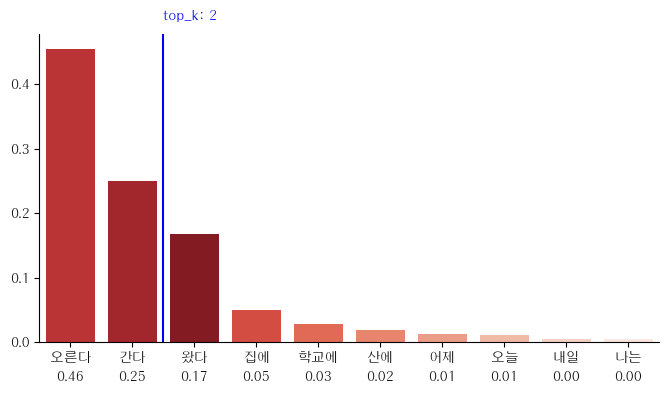

In [28]:
def draw_prob_graph(vocab, probs, top_k):

    # Smaller figure size
    plt.figure(figsize=(8, 4))

    # Gradient from light to dark red
    colors = sns.color_palette("Reds", n_colors=len(vocab))

    # Sort the vocabulary and probabilities
    sorted_vocab_prob = sorted(zip(vocab, probs), key=lambda x: x[1], reverse=True)
    sorted_vocab, sorted_probs = zip(*sorted_vocab_prob)

    # Convert numpy array to list for the palette
    palette_as_list = [colors[vocab.index(word)] for word in sorted_vocab]
    print(sorted_probs)

    # Using 'hue' with the same values as 'x' and setting legend to False
    sns.barplot(x=sorted_vocab, y=sorted_probs, hue=sorted_vocab, palette=palette_as_list, dodge=False)
    plt.legend([],[], frameon=False)

    
    cutoff_index = top_k - 0.5

     # Add the text with the probabilities below the bars
    for i, prob in enumerate(sorted_probs):
        plt.text(i, -0.045, f'{prob:.2f}', ha='center', va='top', color='black')


    # Draw a vertical line at the cutoff point
    plt.axvline(x=cutoff_index, color='blue')
    plt.text(cutoff_index, 0.5, f'top_k: {top_k}', color='blue', ha='left')        

    sns.despine()
    plt.show()


vocab = list(vocab_logits.keys())
logits = list(vocab_logits.values())
temperature = 0.25
probs = softmax_with_temperature(logits, temperature)
print("top_k")
draw_prob_graph(vocab, probs, 2)